In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-wide-datasets/event
/kaggle/input/stock-market-wide-datasets/000000000010Q
/kaggle/input/stock-market-wide-datasets/000000000004Q
/kaggle/input/stock-market-wide-datasets/000000000002Q
/kaggle/input/stock-market-wide-datasets/000000000011Q
/kaggle/input/stock-market-wide-datasets/000000000008Q
/kaggle/input/stock-market-wide-datasets/000000000007Q
/kaggle/input/stock-market-wide-datasets/000000000001Q
/kaggle/input/stock-market-wide-datasets/000000000006Q
/kaggle/input/stock-market-wide-datasets/000000000005Q
/kaggle/input/stock-market-wide-datasets/000000000003Q
/kaggle/input/stock-market-wide-datasets/news
/kaggle/input/stock-market-wide-datasets/000000000009Q
/kaggle/input/stock-market-wide-datasets/000000000000Q
/kaggle/input/stock-market-wide-datasets/AM


How does any ticker at *Q dataset (any, you select it!) moves in an interval of your choice for the same ticker from AM dataset? Through graph and statistical

Statistical Analysis of Q and AM dataset. Show your statistical and ML skills. (KNN,SVM,logistic,K-means,ARIMA,GARCH,LSTM) 

How does the value of any ticker at AM dataset moves 5 days prior to ‘reportDate’ at ‘event’ dataset. Show your statistical and ML skills.

NLP ( entity, sentiment, shortening), LSTM model of ‘summary’ column at ‘news’ dataset and relate it to ‘stock’ and ‘interval’ columns from AM dataset.

In [2]:
df = pd.read_csv("/kaggle/input/stock-market-wide-datasets/000000000010Q")

In [3]:
df

,time,ticker,bid_price,bid_size,ask_price,ask_size
0,2020-08-18 17:53:26 UTC,COTY,3.99,1,4.00,22
1,2020-08-18 17:53:26 UTC,COTY,3.99,1,4.00,22
2,2020-08-18 17:54:22 UTC,COTY,3.99,5,4.00,22
3,2020-08-18 17:53:26 UTC,COTY,3.99,1,4.00,22
4,2020-08-18 18:07:22 UTC,COTY,3.98,5,3.99,22
...,...,...,...,...,...,...
1862992,2020-08-04 19:59:57 UTC,AMD,85.00,2,85.90,250
1862993,2020-08-04 19:59:58 UTC,AMD,85.00,2,85.90,250
1862994,2020-08-04 19:59:58 UTC,AMD,85.00,1,85.90,250
1862995,2020-08-04 19:59:58 UTC,AMD,85.00,1,85.90,250


In [4]:
len(set(df['ticker']))

459

In [5]:
coty = df[df['ticker'] == 'COTY']

In [6]:
coty

,time,ticker,bid_price,bid_size,ask_price,ask_size
0,2020-08-18 17:53:26 UTC,COTY,3.99,1,4.00,22
1,2020-08-18 17:53:26 UTC,COTY,3.99,1,4.00,22
2,2020-08-18 17:54:22 UTC,COTY,3.99,5,4.00,22
3,2020-08-18 17:53:26 UTC,COTY,3.99,1,4.00,22
4,2020-08-18 18:07:22 UTC,COTY,3.98,5,3.99,22
...,...,...,...,...,...,...
1840225,2020-08-04 19:43:15 UTC,COTY,3.80,13,3.81,12
1840235,2020-08-04 19:52:16 UTC,COTY,3.80,18,3.81,12
1840236,2020-08-04 19:52:16 UTC,COTY,3.80,18,3.81,12
1840237,2020-08-04 19:52:16 UTC,COTY,3.80,18,3.81,12


In [7]:
am = pd.read_csv("/kaggle/input/stock-market-wide-datasets/AM")

In [8]:
am.head()

,time,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
0,2020-08-21 15:52:00 UTC,TSN,238,48708,62.9213,62.920,62.920,62.920,62.920,62.9578,1598025120000,1598025180000
1,2020-08-21 15:52:00 UTC,DG,2752,60812,198.9095,198.930,198.930,198.850,198.860,199.2526,1598025120000,1598025180000
2,2020-08-21 15:52:00 UTC,AMD,799,366679,83.0897,83.180,83.180,83.040,83.040,83.0828,1598025120000,1598025180000
3,2020-08-21 15:52:00 UTC,AES,2916,279114,18.1262,18.125,18.130,18.125,18.130,17.9854,1598025120000,1598025180000
4,2020-08-21 15:52:00 UTC,MDT,15770,226874,98.8045,98.795,98.915,98.745,98.885,99.0458,1598025120000,1598025180000


In [9]:
coty1 = am[am['symbol']== 'COTY']

In [10]:
coty1

,time,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
222,2020-08-21 15:52:00 UTC,COTY,202,215128,3.7700,3.770,3.770,3.770,3.770,3.7824,1598025120000,1598025180000
739,2020-08-21 15:44:00 UTC,COTY,200,206716,3.7900,3.790,3.790,3.790,3.790,3.7828,1598024640000,1598024700000
792,2020-08-21 15:39:00 UTC,COTY,396,205282,3.7900,3.790,3.790,3.790,3.790,3.7827,1598024340000,1598024400000
1070,2020-08-21 15:39:00 UTC,COTY,396,205282,3.7900,3.790,3.790,3.790,3.790,3.7827,1598024340000,1598024400000
1336,2020-08-21 15:47:00 UTC,COTY,2054,208976,3.7774,3.780,3.785,3.770,3.770,3.7827,1598024820000,1598024880000
...,...,...,...,...,...,...,...,...,...,...,...,...
1143869,2020-08-10 17:22:00 UTC,COTY,12508,562958,4.1607,4.170,4.170,4.160,4.160,4.1489,1597080120000,1597080180000
1144147,2020-08-07 16:50:00 UTC,COTY,5550,377698,3.9508,3.945,3.960,3.945,3.955,3.8948,1596819000000,1596819060000
1144529,2020-08-06 19:30:00 UTC,COTY,5892,678770,3.9391,3.940,3.940,3.935,3.940,3.9356,1596742200000,1596742260000
1144870,2020-08-10 14:01:00 UTC,COTY,710,43352,4.0861,4.085,4.090,4.085,4.090,4.0603,1597068060000,1597068120000


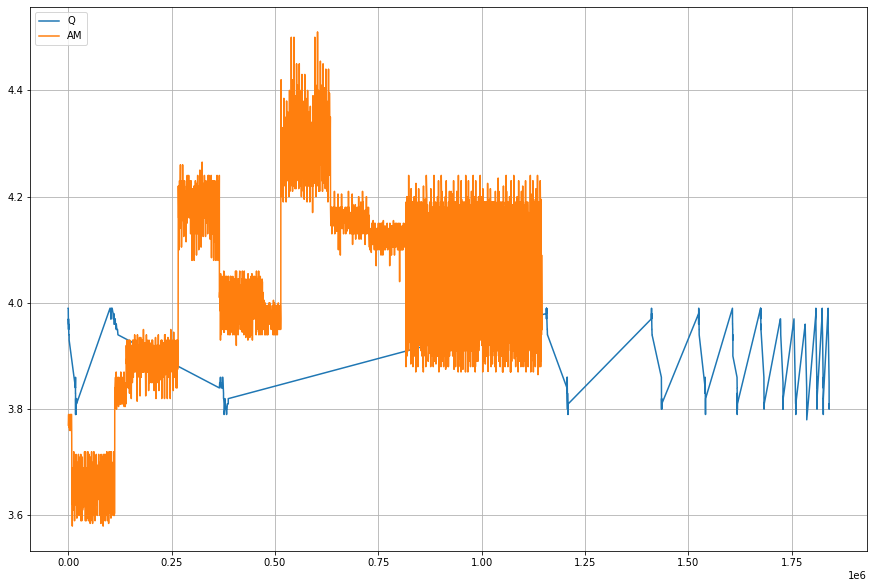

In [11]:

import matplotlib.pyplot as plt
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(coty['bid_price'], label = 'Q')
plt.plot(coty1['close_price'], label = 'AM')
plt.legend(loc=2)

In [12]:
def plot(x,y):
    plt.bar(x,y,color ='maroon', width = .4)
    plt.xlabel("Time")
    plt.ylabel("Bid Price")
    plt.title("Bid price at time")
    plt.show()

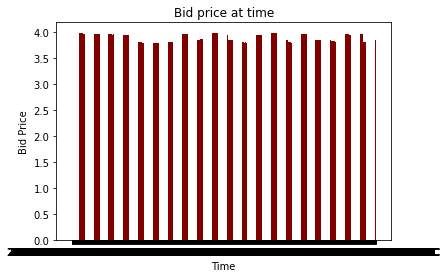

In [13]:
# plot for Q dataset between time and last bid price
plot(coty['time'],coty['bid_price'])

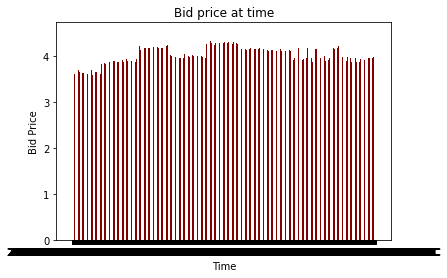

In [14]:
#plot for AM dataset between time and closing bidding price
plot(coty1['time'],coty1['close_price'])

In [29]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encode = lab_enc.fit_transform(coty['bid_price'])

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(coty.iloc[ : ,3:6],encode)

KNeighborsClassifier()

In [32]:
X = classifier.predict(coty.iloc[ : ,3:6])

In [33]:
X

array([16, 16,  3, ...,  2,  2, 14])

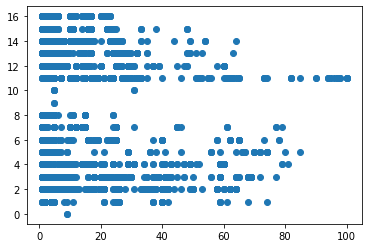

In [36]:
# scatter plot between ask price and bid price
plt.scatter(coty.iloc[ : ,5:6],encode)

In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(5)

In [39]:
kmeans.fit(coty.iloc[ : ,2:6])

KMeans(n_clusters=5)

In [40]:
X = kmeans.predict(coty.iloc[ : ,2:6])

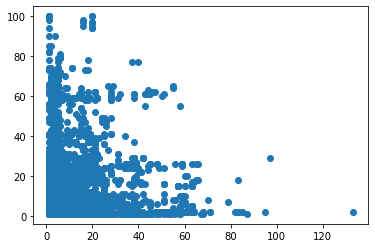

In [41]:
plt.scatter(coty.iloc[ : ,2:4],coty.iloc[ : ,4:6])

**Arima Modle**: A model that uses depenent raltionship between observation and some number of lagged observations.
AR = Autoregression
ARIMA is combination of:
I = Integration
MA = Moving Average

In [42]:
from statsmodels.tsa.arima_model import ARIMA


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.bid_price   No. Observations:                 5456
Model:                 ARIMA(5, 1, 0)   Log Likelihood               17455.044
Method:                       css-mle   S.D. of innovations              0.010
Date:                Tue, 08 Sep 2020   AIC                         -34896.087
Time:                        14:14:33   BIC                         -34849.856
Sample:                             1   HQIC                        -34879.955
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.299e-05      0.000     -0.240      0.810      -0.000       0.000
ar.L1.D.bid_price    -0.0028      0.014     -0.204      0.838      -0.029       0.024
ar.L2.D.bid_price     0.

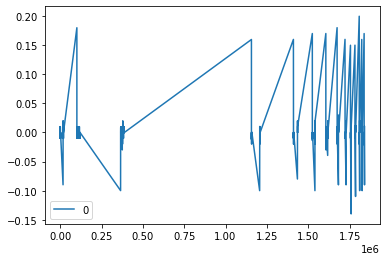

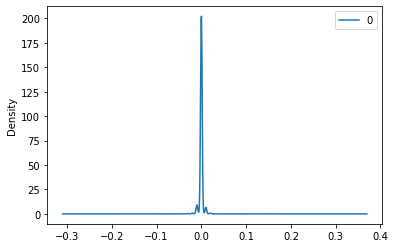

                  0
count  5.456000e+03
mean   5.390391e-08
std    9.871679e-03
min   -1.399679e-01
25%    3.210978e-05
50%    3.210978e-05
75%    3.210978e-05
max    1.997905e-01


In [43]:
model = ARIMA(coty['bid_price'], order=(5,1,0))
model_fit = model.fit(disp =0)
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
#!pip install pyflux
#import pyflux as pf


In [ ]:
#model = arch_model(coty, mean='Zero', vol='ARCH', p=15)

In [44]:
from keras.layers import LSTM
